# Step 1: Setup


In [36]:
import tensorflow as tf

In [37]:
tf.__version__

'2.12.0'

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [39]:
# Importing the dataset
from tensorflow.keras.datasets import mnist

In [40]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) =mnist.load_data()

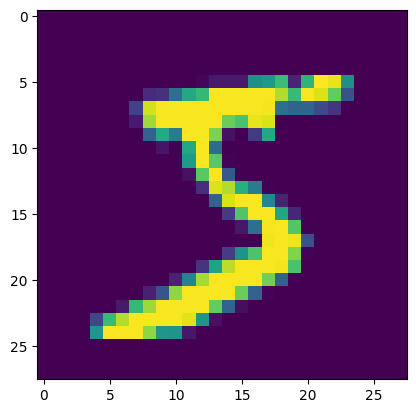

In [41]:
plt.imshow(x_train[0])

In [42]:
y_train[0]

5

In [43]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [44]:
x_test.shape, y_train.shape

((10000, 28, 28), (60000,))

In [45]:
x_train.min(), x_train.max()

(0, 255)

In [46]:
y_train.min(), y_train.max()

(0, 9)

In [47]:
# normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [48]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [49]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [50]:
# reshape  the images
x_train = x_train.reshape(60000, 28, 28,1)
x_test = x_test.reshape(10000, 28, 28,1)

In [51]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [52]:
input_shape = x_train[0].shape

In [53]:
input_shape

(28, 28, 1)

# Step 3: Building the Model

In [54]:
# Define the object
model = tf.keras.models.Sequential()

In [55]:
# Adding the first CNN Layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape = input_shape))

# Adding the second CNN Layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

# Adding Maxpool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# adding dropout layer
model.add(tf.keras.layers.Dropout(.4))

# adding flattern layer
model.add(tf.keras.layers.Flatten())

# adding fully connected layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Adding output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               589952    
                                                      

In [57]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

# Step 4: Training the model

In [60]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 117s 245ms/step - loss: 0.1969 - sparse_categorical_accuracy: 0.9394 - val_loss: 0.0627 - val_sparse_categorical_accuracy: 0.9802
Epoch 2/10
469/469 [==============================] - 111s 237ms/step - loss: 0.0635 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.0423 - val_sparse_categorical_accuracy: 0.9862
Epoch 3/10
469/469 [==============================] - 113s 241ms/step - loss: 0.0438 - sparse_categorical_accuracy: 0.9861 - val_loss: 0.0357 - val_sparse_categorical_accuracy: 0.9878
Epoch 4/10
469/469 [==============================] - 111s 236ms/step - loss: 0.0355 - sparse_categorical_accuracy: 0.9888 - val_loss: 0.0349 - val_sparse_categorical_accuracy: 0.9885
Epoch 5/10
469/469 [==============================] - 166s 355ms/step - loss: 0.0272 - sparse_categorical_accuracy: 0.9910 - val_loss: 0.0312 - val_sparse_categorical_accuracy: 0.9899
Epoch 6/10
469/469 [==============================] - 138s 295ms/step - loss: 0.

In [63]:
# model predictions
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

313/313 [==============================] - 6s 18ms/step


In [64]:
y_pred[3], y_test[3]

(0, 0)

In [65]:
y_pred[33], y_test[33]

(4, 4)

In [66]:
y_pred[355], y_test[355]

(8, 8)

In [67]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 973,    0,    2,    0,    0,    1,    1,    1,    2,    0],
       [   0, 1132,    0,    0,    0,    0,    2,    1,    0,    0],
       [   0,    1, 1023,    1,    0,    0,    0,    3,    4,    0],
       [   0,    0,    1, 1002,    0,    3,    0,    2,    2,    0],
       [   0,    0,    0,    0,  975,    0,    4,    0,    0,    3],
       [   0,    0,    1,    5,    0,  881,    3,    0,    2,    0],
       [   5,    2,    0,    0,    1,    1,  948,    0,    1,    0],
       [   0,    2,    5,    1,    0,    0,    0, 1015,    1,    4],
       [   1,    0,    1,    0,    0,    0,    1,    1,  967,    3],
       [   0,    0,    0,    0,    4,    3,    0,    1,    5,  996]])

In [68]:
acc = accuracy_score(y_test, y_pred)
acc

0.9912

# Learning curve

In [69]:
def learning_curve (history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # training vs validation loss
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

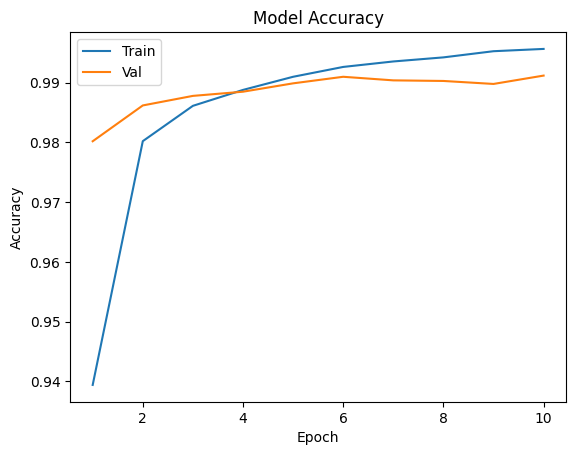

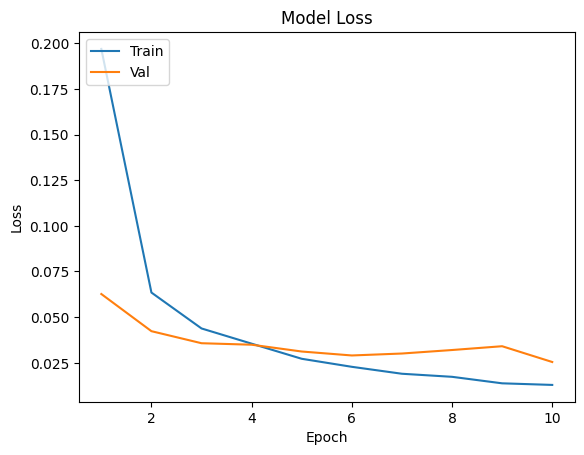

In [70]:
learning_curve(history, 10)